In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
data = pd.read_csv('Loan Prediction Dataset.csv')

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [79]:
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [80]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [81]:
# fill numerical null values with mean value
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

# fill numerical null values with mode value
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [82]:
# fill categorical null values with mode value
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [83]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [84]:
categorical_features = [feature for feature in data.columns if data[feature].dtypes=='O']
numerical_features   = [feature for feature in data.columns if data[feature].dtypes!='O']

print(categorical_features)
print(numerical_features)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [85]:
categorical_features.remove('Loan_ID')
categorical_features.append('Credit_History')
numerical_features.remove('Credit_History')

print(categorical_features)
print(numerical_features)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Credit_History']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']


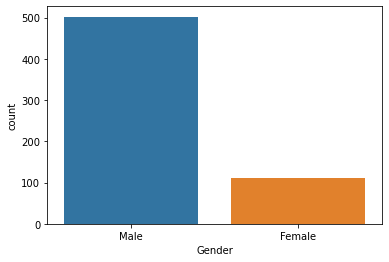

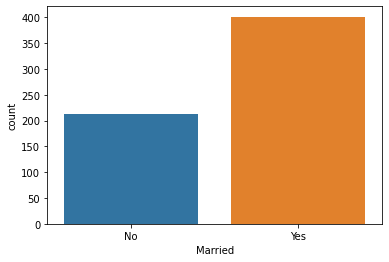

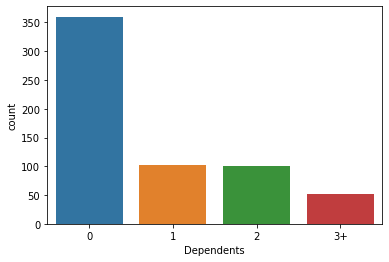

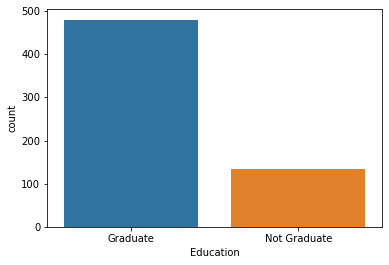

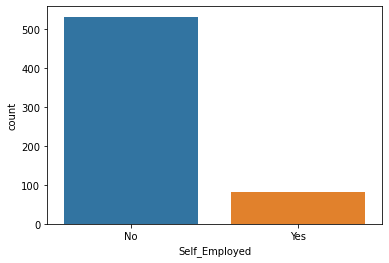

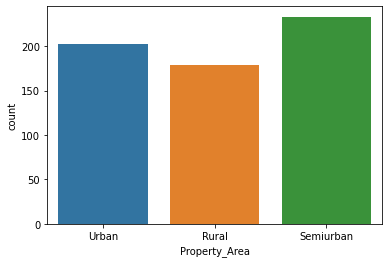

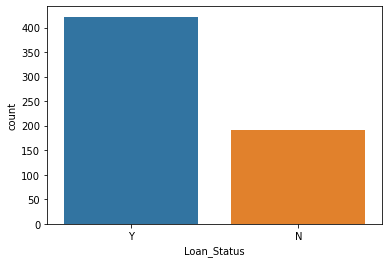

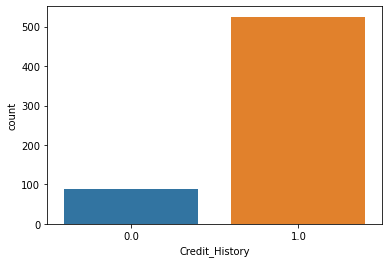

In [87]:
for i in categorical_features:
    plt.figure()
    plot1 = sns.countplot(x=data[i])

In [88]:
numerical_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [89]:
features = list(data.columns)

In [90]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


C:\PythonAnaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TotalIncome', ylabel='Density'>

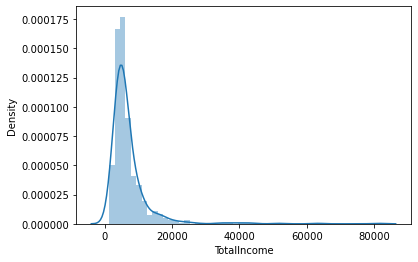

In [91]:
sns.distplot(data['TotalIncome'])

<AxesSubplot:>

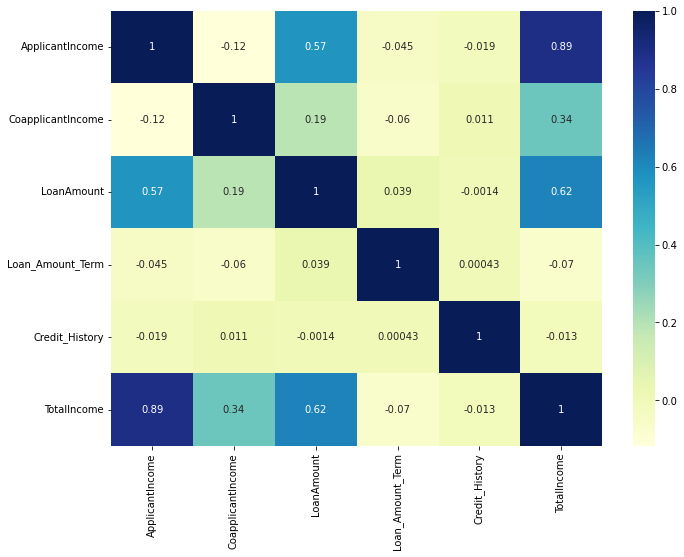

In [92]:
correlation = data.corr()
plt.figure(figsize = (11,8))
sns.heatmap(correlation,annot=True, cmap="YlGnBu")

In [93]:
data = data.drop(columns='Loan_ID', axis = 1)

In [94]:
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History']

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in categorical_features:
    data[i] = le.fit_transform(data[i])

In [96]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,2,1,6000.0


In [97]:
numerical_features

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [98]:
numerical_features.append('TotalIncome')
numerical_features.remove('CoapplicantIncome')

numerical_features

['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'TotalIncome']

In [99]:
for i in numerical_features:
    data[i] = np.log(data[i])
    
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,8.674026,0.0,4.986426,5.886104,1,2,1,8.674026
1,1,1,1,0,0,8.430109,1508.0,4.852030,5.886104,1,0,0,8.714568
2,1,1,0,0,1,8.006368,0.0,4.189655,5.886104,1,2,1,8.006368
3,1,1,0,1,0,7.856707,2358.0,4.787492,5.886104,1,2,1,8.505323
4,1,0,0,0,0,8.699515,0.0,4.948760,5.886104,1,2,1,8.699515


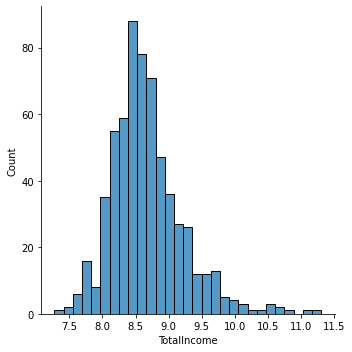

In [100]:
sns.displot(data['TotalIncome'], kind="hist")    #easy to study normal distribution

In [101]:
x = data.drop(columns=['Loan_Status'], axis=1)

In [102]:
y = data['Loan_Status']

In [103]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [104]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,0,0,0,0,8.674026,0.0,4.986426,5.886104,1,2,8.674026
1,1,1,1,0,0,8.430109,1508.0,4.852030,5.886104,1,0,8.714568
2,1,1,0,0,1,8.006368,0.0,4.189655,5.886104,1,2,8.006368
3,1,1,0,1,0,7.856707,2358.0,4.787492,5.886104,1,2,8.505323
4,1,0,0,0,0,8.699515,0.0,4.948760,5.886104,1,2,8.699515


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [106]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=7)

In [115]:
def func(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=8)
    model.fit(x_train, y_train)
    print('Accuracy is', model.score(x_test, y_test)*100)
    
    score = cross_val_score(model, x, y, cv=5)
    print('Cross validation score is', np.mean(score)*100)

In [116]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
func(lreg,x,y)

Accuracy is 88.6178861788618
Cross validation score is 80.78368652538984


C:\PythonAnaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\PythonAnaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_opt

In [117]:
lreg.predict(x_test)

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [119]:
lreg.score(x_test,y_test)

0.8292682926829268

In [120]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
func(dtc, x, y)

Accuracy is 73.98373983739837
Cross validation score is 72.47900839664135


In [122]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
rfc = RandomForestClassifier()
func(rfc,x,y)

Accuracy is 83.73983739837398
Cross validation score is 78.66719978675197


In [123]:
etc = ExtraTreesClassifier()
func(etc,x,y)

Accuracy is 83.73983739837398
Cross validation score is 76.87458349993335


In [124]:
from sklearn.metrics import confusion_matrix

y_prediction = lreg.predict(x_test)
cm = confusion_matrix(y_test, y_prediction)
cm

array([[20, 19],
       [ 2, 82]], dtype=int64)

<AxesSubplot:>

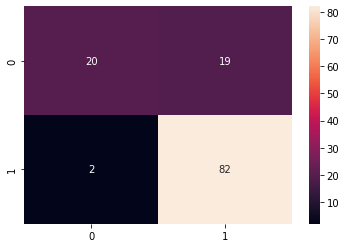

In [125]:
sns.heatmap(cm, annot=True)

In [127]:
# y axis - actual values
# x axis - predicted values

# 0- wrong
# 1- right

In [ ]:
"""
0,0 = True Negetive
0,1 = False Negetive
1,0 = False Positive
1,1 = True Positive

"""